# <center>Лабораторна робота № 2.<br> Аналіз даних про пасажирів лайнеру "Титанік"</center>

**В завданні пропонується за допомогою Pandas відповісти на декілька питань за даними репозиторія Kaggle (https://www.kaggle.com/c/titanic/data) (качати дані не потрібно – вони вже є в директорії роботи).**


In [1]:
import pandas as pd

**Зчитати дані з файлу в пам'ять у вигляді об'єкта Pandas.DataFrame**

**Доступ до даних на google drive**, якщо ви відкриваєте блокнот в **google colab**, а не на PC, можна отримати шляхом монтування google drive

In [2]:
# шлях до папки з даними
data_folder = 'data/'

In [3]:
data = pd.read_csv(data_folder+'/titanic_train.csv', index_col='PassengerId')

**Дані представлені у вигляді таблиці. Подивимося на перші 5 рядків:**

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для прикладу відберемо пасажирів, які сіли в Cherbourg (Embarked=C) і заплатили більше 200$ за білет (fare > 200).**

Переконайтеся, що Ви розумієте, як ця конструкція працює. <br>
Якщо ні – подивіться як обчислюється вираз в квадратних дужках.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можна відсортувати цих людей за зменшенням плати за білет.**

In [7]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Приклад створення ознаки.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [9]:
age_categories = [age_category(age) for age in data.Age]

In [10]:
data['Age_category'] = age_categories

**Інший спосіб – через `apply`.**

In [11]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Скільки чоловіків / жінок знаходилося на борту?**
- 577 чоловіків і 314 жінок

In [12]:
# Ваш код тут

gender_counts = data['Sex'].value_counts()

print(gender_counts)

Sex
male      577
female    314
Name: count, dtype: int64


**2. Виведіть розподіл змінної `Pclass` (соціально-економічний статус) і цей же розподіл, тілько для чоловіків / жінок окремо. Скільки було чоловіків 2-го класу?**4
- 108


In [13]:
# Ваш код тут
# Розподіл Pclass (соціально-економічний статус)
pclass_distribution = data['Pclass'].value_counts()
print("Розподіл Pclass серед усіх пасажирів:")
print(pclass_distribution)

# Розподіл Pclass серед чоловіків
pclass_distribution_men = data[data['Sex'] == 'male']['Pclass'].value_counts()
print("\nРозподіл Pclass серед чоловіків:")
print(pclass_distribution_men)

# Розподіл Pclass серед жінок
pclass_distribution_women = data[data['Sex'] == 'female']['Pclass'].value_counts()
print("\nРозподіл Pclass серед жінок:")
print(pclass_distribution_women)

# Кількість чоловіків 2-го класу
men_in_2nd_class = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].shape[0]
print(f"\nКількість чоловіків 2-го класу: {men_in_2nd_class}")

Розподіл Pclass серед усіх пасажирів:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Розподіл Pclass серед чоловіків:
Pclass
3    347
1    122
2    108
Name: count, dtype: int64

Розподіл Pclass серед жінок:
Pclass
3    144
1     94
2     76
Name: count, dtype: int64

Кількість чоловіків 2-го класу: 108


**3. Які значення медіани і стандартного відхилення платежів (`Fare`)? Виконайте округлення до 2 десяткових знаків.**
- Медіана – 14.45, стандартне відхилення – 49.69

In [14]:
# Ваш код тут
# Обчислення медіани і стандартного відхилення для змінної 'Fare'
fare_median = round(data['Fare'].median(), 2)
fare_std = round(data['Fare'].std(), 2)

print(f"Медіана: {fare_median}")
print(f"Стандартне відхилення: {fare_std}")

Медіана: 14.45
Стандартне відхилення: 49.69


**4. Чи правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Яка частка виживших в обох групах?**

- 40.6% серед молодих і 22.7% серед старих

In [15]:
# Ваш код тут
# Люди молодші 30 років
young_survival_rate = data[data['Age'] < 30]['Survived'].mean()

# Люди старші 60 років
old_survival_rate = data[data['Age'] > 60]['Survived'].mean()

# Округлення результатів до 3 десяткових знаків
young_survival_rate = round(young_survival_rate, 3) * 100
old_survival_rate = round(old_survival_rate, 3) * 100

print(f"Частка виживших молодших 30 років: {young_survival_rate}")
print(f"Частка виживших старших 60 років: {old_survival_rate}")

Частка виживших молодших 30 років: 40.6
Частка виживших старших 60 років: 22.7


**5. Чи правда, що жінки виживали частіше чоловіків? Яка частка виживших в обох групах?**
- 18.9% серед чоловіків і 74.2% серед жінок

In [16]:
# Ваш код тут
# Частка виживших серед жінок
women_survival_rate = data[data['Sex'] == 'female']['Survived'].mean()

# Частка виживших серед чоловіків
men_survival_rate = data[data['Sex'] == 'male']['Survived'].mean()

# Округлення результатів до 3 десяткових знаків
women_survival_rate = round(women_survival_rate, 3) * 100
men_survival_rate = round(men_survival_rate, 3) * 100

print(f"Частка виживших серед жінок: {women_survival_rate}")
print(f"Частка виживших серед чоловіків: {men_survival_rate}")

Частка виживших серед жінок: 74.2
Частка виживших серед чоловіків: 18.9


**6. Знайдіть найбільш популярні імена серед пасажирів Титаніку чоловічої статі**

- William


In [17]:
# Ваш код тут
# Вибір тільки чоловіків і створення копії
male_passengers = data[data['Sex'] == 'male'].copy()

# Виділення першого імені з колонки 'Name'
male_passengers['First_Name'] = male_passengers['Name'].str.extract(r'\.\s*([A-Za-z]+)')

# Підрахунок найбільш популярних імен
popular_names = male_passengers['First_Name'].value_counts().head(10)

print("Найбільш популярні імена серед чоловіків-пасажирів:")
print(popular_names)

Найбільш популярні імена серед чоловіків-пасажирів:
First_Name
William    35
John       25
George     14
Charles    13
Thomas     13
Henry      12
James      11
Richard    10
Edward      9
Johan       9
Name: count, dtype: int64


**7. Порівняйте графічно розподіли вартості білетів і віку у врятованих та загиблих. Середній вік загиблих вище, правильно?**
- Так, середній вік загиблих вище

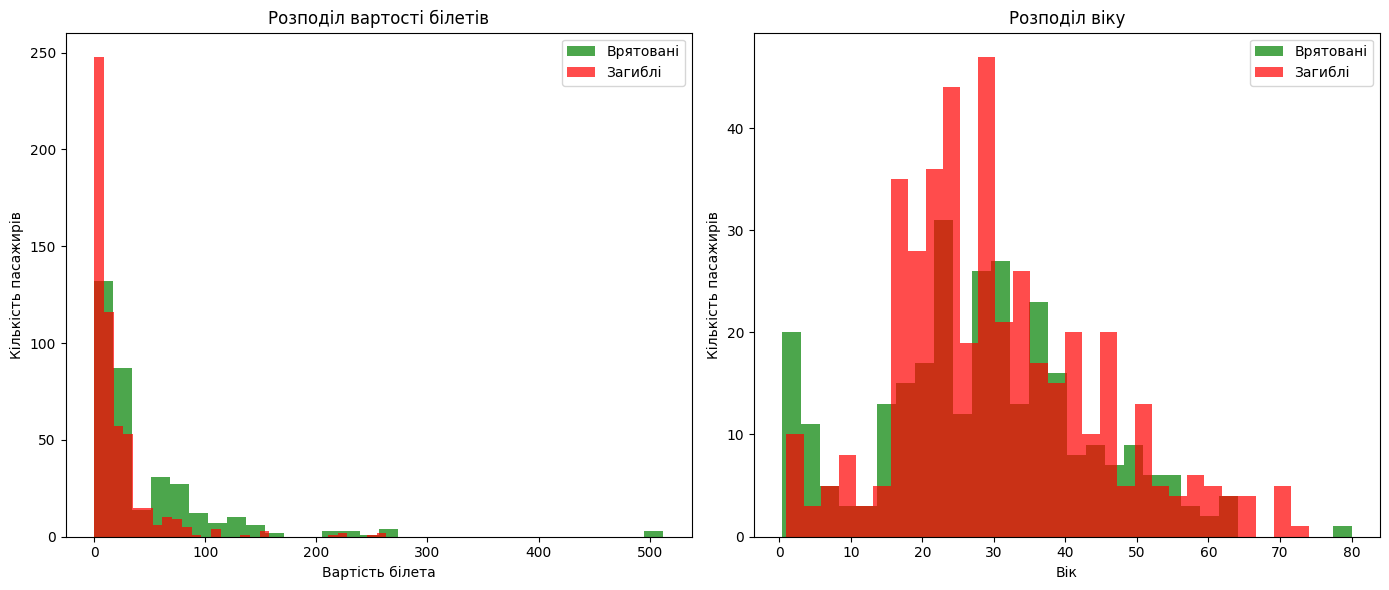

Середній вік врятованих: 28.34 років
Середній вік загиблих: 30.63 років


In [18]:
# Ваш код тут

import matplotlib.pyplot as plt

# Розподіл вартості білетів серед врятованих і загиблих
survived_fare = data[data['Survived'] == 1]['Fare']
died_fare = data[data['Survived'] == 0]['Fare']

# Розподіл віку серед врятованих і загиблих
survived_age = data[data['Survived'] == 1]['Age']
died_age = data[data['Survived'] == 0]['Age']

# Створення графіків
plt.figure(figsize=(14, 6))

# Графік для вартості білетів
plt.subplot(1, 2, 1)
plt.hist(survived_fare, bins=30, alpha=0.7, label='Врятовані', color='g')
plt.hist(died_fare, bins=30, alpha=0.7, label='Загиблі', color='r')
plt.title('Розподіл вартості білетів')
plt.xlabel('Вартість білета')
plt.ylabel('Кількість пасажирів')
plt.legend()

# Графік для віку
plt.subplot(1, 2, 2)
plt.hist(survived_age, bins=30, alpha=0.7, label='Врятовані', color='g')
plt.hist(died_age, bins=30, alpha=0.7, label='Загиблі', color='r')
plt.title('Розподіл віку')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()

# Показуємо графіки
plt.tight_layout()
plt.show()

# Обчислення середнього віку загиблих та врятованих
avg_survived_age = survived_age.mean()
avg_died_age = died_age.mean()

print(f"Середній вік врятованих: {avg_survived_age:.2f} років")
print(f"Середній вік загиблих: {avg_died_age:.2f} років")

**8. Як відрізняється середній вік чоловіків / жінок в залежності від класу обслуговування? Оберіть правильні твердження:**
- В середньому чоловіки 1-го класу старші 40 років
- Чоловіки всіх класів в середньому старші жінок того ж класу
- В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу

In [19]:
# Ваш код тут
# Обчислення середнього віку чоловіків і жінок в залежності від класу обслуговування
avg_age_by_class_and_gender = data.groupby(['Pclass', 'Sex'])['Age'].mean()

# Виведення результатів
print(avg_age_by_class_and_gender)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64
